In [1]:
import os
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import glob

import random
from PIL import Image
from tqdm import tqdm

In [2]:
# !python3 -m pip install tensorflow-gpu

In [2]:
!pip install cmake
!pip install dlib
!pip install face_recognition

In [3]:
import face_recognition

# Checking blocks
## Augmented Option

153


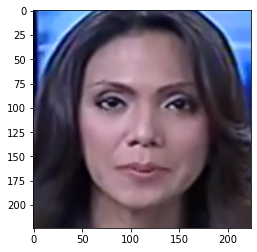

In [4]:
path = '0135.png'
test_img = cv2.imread(path)
test_img = np.array(test_img)
original_dim = len(test_img)
print(original_dim)
test_img = cv2.resize(test_img,(224,224))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img);

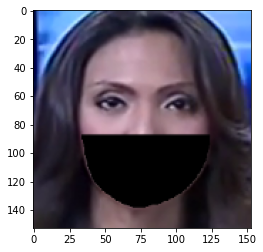

In [5]:
import cutout_augmentation as ca

test_img = ca.facial_mask_cutout_augmentation(test_img, prob = 1.0)
test_img = np.array(test_img)
test_img = cv2.resize(test_img,(original_dim,original_dim))
plt.imshow(test_img);

## Original Option

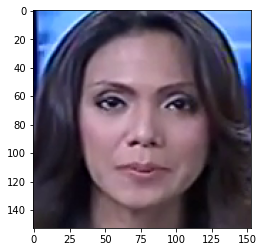

In [5]:
img = cv2.imread('0135.png')
img = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img);

# Required Function

In [6]:
def prep_for_augmenting(path, method):
    
    if not os.path.exists(path):
        print(f"cannot find the specified path from {path}")
        exit()
    
    if path[path.rfind('/')+1:] == 'fake':
        os.mkdir(method)
        os.mkdir(method + '/forensics_split')
        os.mkdir(method + '/forensics_split/train')
    
    try:
        os.mkdir(method + '/' + path.replace('ff_disk/home/jupyter/',''))
    except FileExistsError:
        print(method + '/' + path.replace('ff_disk/home/jupyter/',''), "already exists")
        
    images_lst = glob.glob(path + "/*.png")
    
    return images_lst

# GridMask

In [5]:
def save_GridMask(path, img_path): 
    
    aug_images_lst = glob.glob('GridMask/' + path.replace('ff_disk/home/jupyter/','') + "/*.png")
    aug_images_lst = [e[len(e)-8:len(e)] for e in aug_images_lst]
            
    if img_path[len(img_path)-8:len(img_path)] in aug_images_lst: exit()
    
    if tf.random.uniform(shape=[], minval=0.0, maxval=1.0) <= 0.5:
        img = cv2.imread(img_path)
        img = np.array(img)
        original_dim = len(img)
        img = cv2.resize(img,(224,224))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        aug_img = ca.GridMask_augmentation(img, prob = 1.0)
        aug_img = np.array(aug_img)
        aug_img = cv2.resize(aug_img,(original_dim,original_dim))
        aug_img = cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)
        
    else: aug_img = cv2.imread(img_path)
        
    save_img_path = os.path.join('GridMask/' + img_path.replace('ff_disk/home/jupyter/',''))
    cv2.imwrite(save_img_path, aug_img)

In [6]:
images_names = prep_for_augmenting('ff_disk/home/jupyter/forensics_split/train/authentic', 'GridMask')
print(images_names[0])
print(len(images_names))

ff_disk/home/jupyter/forensics_split/train/authentic/Original_877_0540.png
24789


In [ ]:
for img_path in tqdm(sorted(images_names)):
    save_GridMask('ff_disk/home/jupyter/forensics_split/train/authentic', img_path)

 53%|█████▎    | 13062/24789 [10:00<12:32, 15.59it/s]

In [6]:
images_names = prep_for_augmenting('ff_disk/home/jupyter/forensics_split/train/fake', 'GridMask')
print(images_names[0])
print(len(images_names))

ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_155_576_0135.png
89139


In [7]:
for img_path in tqdm(sorted(images_names)):
    save_GridMask('ff_disk/home/jupyter/forensics_split/train/fake', img_path)

100%|██████████| 89139/89139 [4:17:47<00:00,  5.76it/s]  


# GridMask-Alternative

In [4]:
def save_Gridmask_Alt(path, img_path): 
    
    aug_images_lst = glob.glob('GridMask-Alt/' + path.replace('ff_disk/home/jupyter/','') + "/*.png")
    aug_images_lst = [e[len(e)-8:len(e)] for e in aug_images_lst]
            
    if img_path[len(img_path)-8:len(img_path)] in aug_images_lst: exit()
        
    img = cv2.imread(img_path)
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    aug_img = ca.alternative_GridMask_augmentation(img, prob = 0.5)
    aug_img = cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)
    
    save_img_path = os.path.join('GridMask-Alt/' + img_path.replace('ff_disk/home/jupyter/',''))
    cv2.imwrite(save_img_path, aug_img)

In [5]:
images_names = prep_for_augmenting('ff_disk/home/jupyter/forensics_split/train/authentic', 'GridMask-Alt')
print(images_names[0])
print(len(images_names))

ff_disk/home/jupyter/forensics_split/train/authentic/Original_877_0540.png
24789


In [6]:
for img_path in tqdm(sorted(images_names)):
    save_Gridmask_Alt('ff_disk/home/jupyter/forensics_split/train/authentic', img_path)

100%|██████████| 24789/24789 [23:48<00:00, 17.35it/s]


In [5]:
images_names = prep_for_augmenting('ff_disk/home/jupyter/forensics_split/train/fake', 'GridMask-Alt')
print(images_names[0])
print(len(images_names))

GridMask-Alt/forensics_split/train/fake already exists
ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_155_576_0135.png
89139


In [6]:
for img_path in tqdm(sorted(images_names)[70294:]): # 60%
    save_Gridmask_Alt('ff_disk/home/jupyter/forensics_split/train/fake', img_path)

100%|██████████| 18845/18845 [1:32:28<00:00,  3.40it/s]


# FacialArtifacts

In [7]:
def save_FacialArtifacts(path, img_path): 
    
    aug_images_lst = glob.glob('FacialArtifacts/' + path.replace('ff_disk/home/jupyter/','') + "/*.png")
    aug_images_lst = [e[len(e)-8:len(e)] for e in aug_images_lst]
            
    if img_path[len(img_path)-8:len(img_path)] in aug_images_lst: exit()
        
    img = cv2.imread(img_path)
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    aug_img = ca.facial_artifacts_cutout_augmentation(img, img_path, prob = 0.5)
    aug_img = cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)
    
    save_img_path = os.path.join('FacialArtifacts/' + img_path.replace('ff_disk/home/jupyter/',''))
    cv2.imwrite(save_img_path, aug_img)

In [8]:
# images_names = prep_for_augmenting('ff_disk/home/jupyter/forensics_split/train/authentic', 'FacialArtifacts')
images_names = glob.glob('ff_disk/home/jupyter/forensics_split/train/authentic' + "/*.png")
print(images_names[0])
print(len(images_names))

ff_disk/home/jupyter/forensics_split/train/authentic/Original_877_0540.png
24789


In [9]:
for img_path in tqdm(sorted(images_names)[23000:]): # 12206
    save_FacialArtifacts('ff_disk/home/jupyter/forensics_split/train/authentic', img_path)

100%|██████████| 1789/1789 [03:50<00:00,  7.77it/s]


In [8]:
# images_names = prep_for_augmenting('ff_disk/home/jupyter/forensics_split/train/fake', 'FacialArtifacts')
images_names = glob.glob('ff_disk/home/jupyter/forensics_split/train/fake' + "/*.png")
print(images_names[0])
print(len(images_names))

ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_155_576_0135.png
89139


In [9]:
for img_path in tqdm(sorted(images_names)[9382+11252:]): # 68505
    save_FacialArtifacts('ff_disk/home/jupyter/forensics_split/train/fake', img_path)

  0%|          | 26/68505 [00:04<3:14:52,  5.86it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Deepfakes_809_799_0030.png


  2%|▏         | 1450/68505 [04:57<4:29:32,  4.15it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Deepfakes_869_780_0270.png


  2%|▏         | 1454/68505 [04:58<3:47:39,  4.91it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Deepfakes_869_780_0315.png


  3%|▎         | 2134/68505 [07:12<7:25:46,  2.48it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Deepfakes_894_848_0120.png


  3%|▎         | 2138/68505 [07:14<6:01:52,  3.06it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Deepfakes_894_848_0270.png


  7%|▋         | 4497/68505 [14:54<2:34:57,  6.88it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_016_209_0210.png


 14%|█▍        | 9899/68505 [31:30<5:18:37,  3.07it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_217_117_0405.png


 14%|█▍        | 9901/68505 [31:31<5:56:56,  2.74it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_217_117_0435.png


 14%|█▍        | 9902/68505 [31:31<6:40:44,  2.44it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_217_117_0450.png


 16%|█▌        | 11093/68505 [35:04<2:52:22,  5.55it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_258_246_0150.png


 23%|██▎       | 15859/68505 [50:05<3:30:01,  4.18it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_436_526_0375.png


 23%|██▎       | 15879/68505 [50:09<4:14:27,  3.45it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_436_526_0660.png


 24%|██▍       | 16277/68505 [51:44<2:09:22,  6.73it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_456_435_0390.png


 24%|██▍       | 16591/68505 [52:49<2:06:01,  6.87it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_474_281_0210.png


 27%|██▋       | 18465/68505 [58:55<2:49:11,  4.93it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_549_531_0000.png


 27%|██▋       | 18470/68505 [58:57<3:08:47,  4.42it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_549_531_0060.png


 27%|██▋       | 18475/68505 [58:57<2:43:28,  5.10it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_549_531_0165.png


 27%|██▋       | 18476/68505 [58:58<3:30:24,  3.96it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_549_531_0180.png


 27%|██▋       | 18479/68505 [58:59<3:45:33,  3.70it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_549_531_0225.png


 27%|██▋       | 18482/68505 [58:59<3:33:28,  3.91it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_549_531_0255.png


 28%|██▊       | 19065/68505 [1:01:02<2:13:10,  6.19it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_576_155_0420.png


 29%|██▉       | 20035/68505 [1:04:14<2:52:04,  4.69it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_618_629_0420.png


 32%|███▏      | 22189/68505 [1:11:34<6:05:48,  2.11it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_713_726_0195.png


 33%|███▎      | 22747/68505 [1:13:29<3:28:27,  3.66it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_738_804_0315.png


 33%|███▎      | 22749/68505 [1:13:29<2:53:06,  4.41it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_738_804_0330.png


 38%|███▊      | 26114/68505 [1:24:54<2:38:04,  4.47it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_869_780_0270.png


 38%|███▊      | 26116/68505 [1:24:54<2:41:40,  4.37it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_869_780_0285.png


 38%|███▊      | 26117/68505 [1:24:54<3:14:13,  3.64it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_869_780_0315.png


 38%|███▊      | 26121/68505 [1:24:55<2:24:11,  4.90it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_869_780_0375.png


 38%|███▊      | 26123/68505 [1:24:56<2:15:29,  5.21it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/Face2Face_869_780_0390.png


 43%|████▎     | 29198/68505 [1:35:16<1:43:14,  6.35it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_014_790_0360.png


 43%|████▎     | 29203/68505 [1:35:17<1:47:18,  6.10it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_014_790_0435.png


 43%|████▎     | 29231/68505 [1:35:21<1:41:11,  6.47it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_016_209_0165.png


 43%|████▎     | 29236/68505 [1:35:22<1:42:59,  6.35it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_016_209_0240.png


 49%|████▉     | 33513/68505 [1:50:14<3:22:00,  2.89it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_217_117_0345.png


 49%|████▉     | 33514/68505 [1:50:15<3:56:45,  2.46it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_217_117_0360.png


 49%|████▉     | 33517/68505 [1:50:16<3:43:07,  2.61it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_217_117_0405.png


 49%|████▉     | 33518/68505 [1:50:16<4:11:27,  2.32it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_217_117_0420.png


 49%|████▉     | 33519/68505 [1:50:17<4:31:59,  2.14it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_217_117_0435.png


 50%|█████     | 34349/68505 [1:52:57<1:52:02,  5.08it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_252_266_0240.png


 53%|█████▎    | 36113/68505 [1:58:52<1:40:57,  5.35it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_332_051_0210.png


 56%|█████▌    | 38172/68505 [2:07:19<2:28:28,  3.40it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_436_526_0375.png


 56%|█████▌    | 38515/68505 [2:09:03<1:39:22,  5.03it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_456_435_0390.png


 57%|█████▋    | 38805/68505 [2:10:20<1:45:04,  4.71it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_474_281_0240.png


 57%|█████▋    | 38806/68505 [2:10:20<1:45:46,  4.68it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_474_281_0255.png


 59%|█████▉    | 40434/68505 [2:16:58<2:09:11,  3.62it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_549_531_0030.png


 59%|█████▉    | 40445/68505 [2:17:00<2:20:03,  3.34it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_549_531_0210.png


 59%|█████▉    | 40447/68505 [2:17:01<2:32:42,  3.06it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_549_531_0240.png


 59%|█████▉    | 40448/68505 [2:17:01<2:47:37,  2.79it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_549_531_0255.png


 61%|██████▏   | 42070/68505 [2:24:15<2:38:28,  2.78it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_641_662_0345.png


 63%|██████▎   | 43379/68505 [2:30:12<3:40:01,  1.90it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_713_726_0195.png


 64%|██████▍   | 44142/68505 [2:33:56<2:33:44,  2.64it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_753_789_0330.png


 68%|██████▊   | 46424/68505 [2:44:22<1:54:43,  3.21it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_869_780_0270.png


 68%|██████▊   | 46425/68505 [2:44:22<1:58:39,  3.10it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_869_780_0285.png


 68%|██████▊   | 46427/68505 [2:44:23<1:55:44,  3.18it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_869_780_0315.png


 69%|██████▉   | 47154/68505 [2:47:41<1:24:23,  4.22it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_905_860_0105.png


 72%|███████▏  | 48990/68505 [2:55:43<1:07:07,  4.85it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_014_790_0390.png


 72%|███████▏  | 49025/68505 [2:55:50<1:06:21,  4.89it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_016_209_0240.png


 78%|███████▊  | 53303/68505 [3:15:24<1:46:48,  2.37it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_217_117_0345.png


 78%|███████▊  | 53305/68505 [3:15:25<1:57:49,  2.15it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_217_117_0375.png


 78%|███████▊  | 53306/68505 [3:15:26<2:12:23,  1.91it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_217_117_0390.png


 78%|███████▊  | 53307/68505 [3:15:27<2:22:09,  1.78it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_217_117_0405.png


 78%|███████▊  | 53308/68505 [3:15:27<2:29:47,  1.69it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_217_117_0420.png


 78%|███████▊  | 53309/68505 [3:15:28<2:34:49,  1.64it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_217_117_0435.png


 78%|███████▊  | 53310/68505 [3:15:29<2:35:21,  1.63it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_217_117_0450.png


 79%|███████▉  | 54227/68505 [3:19:39<1:06:35,  3.57it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_258_246_0150.png


 82%|████████▏ | 55905/68505 [3:27:34<1:05:01,  3.23it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_332_051_0240.png


 82%|████████▏ | 56426/68505 [3:30:08<55:26,  3.63it/s]  

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_356_324_0270.png


 85%|████████▍ | 57961/68505 [3:38:11<1:00:31,  2.90it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_436_526_0375.png


 85%|████████▌ | 58303/68505 [3:40:15<45:57,  3.70it/s]  

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_456_435_0390.png


 86%|████████▌ | 58595/68505 [3:41:54<43:19,  3.81it/s]  

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_474_281_0255.png


 87%|████████▋ | 59289/68505 [3:45:18<39:14,  3.91it/s]  

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_509_525_0090.png


 88%|████████▊ | 60221/68505 [3:49:52<40:56,  3.37it/s]  

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_549_531_0000.png


 88%|████████▊ | 60227/68505 [3:49:54<50:43,  2.72it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_549_531_0090.png


 88%|████████▊ | 60232/68505 [3:49:56<46:16,  2.98it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_549_531_0180.png


 88%|████████▊ | 60234/68505 [3:49:56<52:22,  2.63it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_549_531_0210.png


 88%|████████▊ | 60235/68505 [3:49:57<56:45,  2.43it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_549_531_0225.png


 88%|████████▊ | 60236/68505 [3:49:57<1:00:08,  2.29it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_549_531_0240.png


 89%|████████▊ | 60672/68505 [3:52:16<34:29,  3.78it/s]  

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_576_155_0135.png


 89%|████████▉ | 61156/68505 [3:54:38<50:13,  2.44it/s]  

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_603_575_0045.png


 89%|████████▉ | 61159/68505 [3:54:40<57:36,  2.13it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_603_575_0090.png


 89%|████████▉ | 61161/68505 [3:54:40<56:48,  2.15it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_603_575_0120.png


 89%|████████▉ | 61162/68505 [3:54:41<1:00:36,  2.02it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_603_575_0135.png


 89%|████████▉ | 61170/68505 [3:54:45<1:03:02,  1.94it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_603_575_0255.png


 97%|█████████▋| 66214/68505 [4:20:52<12:51,  2.97it/s]  

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_869_780_0285.png


 97%|█████████▋| 66215/68505 [4:20:53<14:25,  2.65it/s]

issue with face_recognition ff_disk/home/jupyter/forensics_split/train/fake/NeuralTextures_869_780_0300.png


100%|██████████| 68505/68505 [4:33:08<00:00,  4.18it/s]


# FacialArtifacts-Alternative

In [7]:
def save_FacialArtifacts_Alt(path, img_path): 
    
    aug_images_lst = glob.glob('FacialArtifacts-Alt/' + path.replace('ff_disk/home/jupyter/','') + "/*.png")
    aug_images_lst = [e[len(e)-8:len(e)] for e in aug_images_lst]
            
    if img_path[len(img_path)-8:len(img_path)] in aug_images_lst: exit()
          
    img = cv2.imread(img_path)
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    aug_img = ca.alternative_facial_artifacts_cutout_augmentation(img, prob = 0.5)
    aug_img = cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)
    
    save_img_path = os.path.join('FacialArtifacts-Alt/' + img_path.replace('ff_disk/home/jupyter/',''))
    cv2.imwrite(save_img_path, aug_img)

In [9]:
images_names = prep_for_augmenting('ff_disk/home/jupyter/forensics_split/train/authentic', 'FacialArtifacts-Alt')
print(images_names[0])
print(len(images_names))

ff_disk/home/jupyter/forensics_split/train/authentic/Original_877_0540.png
24789


In [10]:
for img_path in tqdm(sorted(images_names)):
    save_FacialArtifacts_Alt('ff_disk/home/jupyter/forensics_split/train/authentic', img_path)

 25%|██▍       | 6075/24789 [1:22:49<3:04:47,  1.69it/s] 

issue with face_parser


 59%|█████▉    | 14609/24789 [3:35:09<4:34:17,  1.62s/it] 

issue with face_parser


100%|██████████| 24789/24789 [6:41:06<00:00,  1.03it/s]   


In [8]:
# images_names = prep_for_augmenting('ff_disk/home/jupyter/forensics_split/train/fake', 'FacialArtifacts-Alt')
images_names = glob.glob('ff_disk/home/jupyter/forensics_split/train/fake' + "/*.png")
print(images_names[0])
print(len(images_names))

ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_155_576_0135.png
89139


In [9]:
for img_path in tqdm(sorted(images_names)[41000+14202+16320:]): # 16321
    save_FacialArtifacts_Alt('ff_disk/home/jupyter/forensics_split/train/fake', img_path)

 14%|█▎        | 2382/17617 [40:41<4:22:25,  1.03s/it] 

issue with face_parser


100%|██████████| 17617/17617 [5:59:54<00:00,  1.23s/it]   


# Facemask

In [9]:
def save_FaceMask(path, img_path): 
    
    aug_images_lst = glob.glob('FaceMask/' + path.replace('ff_disk/home/jupyter/','') + "/*.png")
    aug_images_lst = [e[len(e)-8:len(e)] for e in aug_images_lst]
            
    if img_path[len(img_path)-8:len(img_path)] in aug_images_lst: exit()
          
    img = cv2.imread(img_path)
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    aug_img = ca.facial_mask_cutout_augmentation(img, prob = 0.5)
    aug_img = cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)
    
    save_img_path = os.path.join('FaceMask/' + img_path.replace('ff_disk/home/jupyter/',''))
    cv2.imwrite(save_img_path, aug_img)

In [7]:
# images_names = prep_for_augmenting('ff_disk/home/jupyter/forensics_split/train/authentic', 'FaceMask')
images_names = glob.glob('ff_disk/home/jupyter/forensics_split/train/authentic' + "/*.png")
print(images_names[0])
print(len(images_names))

ff_disk/home/jupyter/forensics_split/train/authentic/Original_877_0540.png
24789


In [ ]:
for img_path in tqdm(sorted(images_names)):
    save_FaceMask('ff_disk/home/jupyter/forensics_split/train/authentic', img_path)

  1%|▏         | 367/24789 [01:47<1:10:54,  5.74it/s]

issue with face_recognition or face_parser


  2%|▏         | 417/24789 [01:54<47:07,  8.62it/s]  

issue with face_recognition or face_parser


 25%|██▍       | 6110/24789 [39:24<6:04:39,  1.17s/it] 

issue with face_recognition or face_parser


 25%|██▍       | 6116/24789 [39:25<2:29:09,  2.09it/s]

issue with face_recognition or face_parser


 29%|██▊       | 7076/24789 [44:17<1:10:35,  4.18it/s]

issue with face_recognition or face_parser


 38%|███▊      | 9337/24789 [59:09<1:40:53,  2.55it/s] 

issue with face_recognition or face_parser


 38%|███▊      | 9339/24789 [59:09<1:20:32,  3.20it/s]

issue with face_recognition or face_parser


 48%|████▊     | 11846/24789 [1:20:10<52:38,  4.10it/s]   

issue with face_recognition or face_parser


 49%|████▉     | 12250/24789 [1:25:55<46:00,  4.54it/s]   

issue with face_recognition or face_parser


 51%|█████     | 12600/24789 [1:29:56<34:56,  5.81it/s]   

issue with face_recognition or face_parser


 54%|█████▍    | 13454/24789 [1:36:47<1:39:26,  1.90it/s]

issue with face_recognition or face_parser
issue with face_recognition or face_parser


 59%|█████▉    | 14578/24789 [1:46:10<57:51,  2.94it/s]  

issue with face_recognition or face_parser


 59%|█████▉    | 14579/24789 [1:46:11<58:18,  2.92it/s]

issue with face_recognition or face_parser


 59%|█████▉    | 14582/24789 [1:46:12<56:20,  3.02it/s]

issue with face_recognition or face_parser


 59%|█████▉    | 14584/24789 [1:46:13<1:10:15,  2.42it/s]

issue with face_recognition or face_parser


 59%|█████▉    | 14588/24789 [1:46:14<55:43,  3.05it/s]  

issue with face_recognition or face_parser


 59%|█████▉    | 14590/24789 [1:46:14<51:41,  3.29it/s]

issue with face_recognition or face_parser


 59%|█████▉    | 14593/24789 [1:46:15<43:02,  3.95it/s]

issue with face_recognition or face_parser


 59%|█████▉    | 14594/24789 [1:46:15<47:33,  3.57it/s]

issue with face_recognition or face_parser


 59%|█████▉    | 14601/24789 [1:46:18<1:02:18,  2.73it/s]

issue with face_recognition or face_parser


 59%|█████▉    | 14604/24789 [1:46:18<45:26,  3.74it/s]  

issue with face_recognition or face_parser


 59%|█████▉    | 14605/24789 [1:46:18<46:04,  3.68it/s]

issue with face_recognition or face_parser


 59%|█████▉    | 14613/24789 [1:46:20<39:19,  4.31it/s]  

issue with face_recognition or face_parser


 62%|██████▏   | 15276/24789 [1:54:51<6:16:27,  2.37s/it]

In [11]:
for img_path in tqdm(sorted(images_names)[15275:]):
    save_FaceMask('ff_disk/home/jupyter/forensics_split/train/authentic', img_path)

 31%|███       | 2914/9514 [26:09<39:33,  2.78it/s]  

issue with face_recognition or face_parser


 38%|███▊      | 3594/9514 [33:21<46:46,  2.11it/s]  

issue with face_recognition or face_parser


 72%|███████▏  | 6818/9514 [1:03:39<11:42,  3.84it/s]  

issue with face_recognition or face_parser


 72%|███████▏  | 6819/9514 [1:03:39<13:51,  3.24it/s]

issue with face_recognition or face_parser


 72%|███████▏  | 6822/9514 [1:03:40<10:58,  4.09it/s]

issue with face_recognition or face_parser


100%|██████████| 9514/9514 [1:31:07<00:00,  1.74it/s]  


In [9]:
images_names = prep_for_augmenting('ff_disk/home/jupyter/forensics_split/train/fake', 'FaceMask')
print(images_names[0])
print(len(images_names))

ff_disk/home/jupyter/forensics_split/train/fake/FaceSwap_155_576_0135.png
89139


In [10]:
for img_path in tqdm(sorted(images_names)): # 78800
    save_FaceMask('ff_disk/home/jupyter/forensics_split/train/fake', img_path)

  0%|          | 365/89139 [02:00<3:39:00,  6.76it/s] 

issue with face_recognition or face_parser


  0%|          | 370/89139 [02:01<3:39:04,  6.75it/s]

issue with face_recognition or face_parser


  0%|          | 401/89139 [02:04<3:47:12,  6.51it/s]

issue with face_recognition or face_parser


  0%|          | 428/89139 [02:07<3:41:07,  6.69it/s]

issue with face_recognition or face_parser


  1%|          | 605/89139 [03:01<10:15:28,  2.40it/s]

issue with face_recognition or face_parser


  5%|▍         | 4223/89139 [29:28<2:28:55,  9.50it/s] 

issue with face_recognition or face_parser


  7%|▋         | 6110/89139 [41:54<11:36:30,  1.99it/s]

issue with face_recognition or face_parser


  7%|▋         | 6112/89139 [41:55<10:07:26,  2.28it/s]

issue with face_recognition or face_parser


  7%|▋         | 6113/89139 [41:55<10:40:56,  2.16it/s]

issue with face_recognition or face_parser


  7%|▋         | 6114/89139 [41:56<11:00:01,  2.10it/s]

issue with face_recognition or face_parser


  7%|▋         | 6115/89139 [41:56<10:46:56,  2.14it/s]

issue with face_recognition or face_parser


  8%|▊         | 7076/89139 [47:23<4:49:41,  4.72it/s] 

issue with face_recognition or face_parser


  8%|▊         | 7180/89139 [48:37<9:13:48,  2.47it/s] 

issue with face_recognition or face_parser


 10%|▉         | 8607/89139 [58:41<7:13:18,  3.10it/s] 

issue with face_recognition or face_parser


 10%|▉         | 8610/89139 [58:41<5:48:28,  3.85it/s]

issue with face_recognition or face_parser


 10%|▉         | 8612/89139 [58:43<10:24:26,  2.15it/s]

issue with face_recognition or face_parser


 10%|▉         | 8615/89139 [58:43<8:00:12,  2.79it/s] 

issue with face_recognition or face_parser


 10%|▉         | 8645/89139 [58:57<6:53:10,  3.25it/s] 

issue with face_recognition or face_parser


 10%|█         | 9045/89139 [1:01:12<7:38:38,  2.91it/s] 

issue with face_recognition or face_parser


 10%|█         | 9099/89139 [1:01:29<8:43:35,  2.55it/s] 

issue with face_recognition or face_parser


 10%|█         | 9337/89139 [1:02:53<7:21:30,  3.01it/s] 

issue with face_recognition or face_parser


 10%|█         | 9339/89139 [1:02:55<9:59:46,  2.22it/s] 

issue with face_recognition or face_parser


 11%|█         | 10022/89139 [1:08:04<9:10:08,  2.40it/s] 

issue with face_recognition or face_parser


 11%|█▏        | 10188/89139 [1:09:36<4:11:11,  5.24it/s] 

issue with face_recognition or face_parser
issue with face_recognition or face_parser


 11%|█▏        | 10197/89139 [1:09:38<3:49:07,  5.74it/s]

issue with face_recognition or face_parser
issue with face_recognition or face_parser


 11%|█▏        | 10199/89139 [1:09:38<3:31:01,  6.23it/s]

issue with face_recognition or face_parser
issue with face_recognition or face_parser


 11%|█▏        | 10201/89139 [1:09:38<3:24:29,  6.43it/s]

issue with face_recognition or face_parser
issue with face_recognition or face_parser


 11%|█▏        | 10207/89139 [1:09:39<3:19:47,  6.58it/s]

issue with face_recognition or face_parser
issue with face_recognition or face_parser


 14%|█▎        | 12250/89139 [1:31:24<3:50:49,  5.55it/s] 

issue with face_recognition or face_parser


 15%|█▌        | 13415/89139 [1:40:56<21:55:22,  1.04s/it]

issue with face_recognition or face_parser


 15%|█▌        | 13423/89139 [1:41:04<17:38:21,  1.19it/s]

issue with face_recognition or face_parser


 15%|█▌        | 13430/89139 [1:41:06<7:55:12,  2.66it/s] 

issue with face_recognition or face_parser


 15%|█▌        | 13439/89139 [1:41:18<19:12:02,  1.10it/s]

issue with face_recognition or face_parser


 15%|█▌        | 13454/89139 [1:41:30<11:39:23,  1.80it/s]

issue with face_recognition or face_parser
issue with face_recognition or face_parser


 15%|█▌        | 13580/89139 [1:42:11<10:26:27,  2.01it/s]

issue with face_recognition or face_parser


 15%|█▌        | 13581/89139 [1:42:11<9:09:34,  2.29it/s] 

issue with face_recognition or face_parser


 16%|█▋        | 14580/89139 [1:51:09<4:45:42,  4.35it/s] 

issue with face_recognition or face_parser


 16%|█▋        | 14584/89139 [1:51:09<4:16:08,  4.85it/s]

issue with face_recognition or face_parser


 16%|█▋        | 14589/89139 [1:51:10<4:48:04,  4.31it/s]

issue with face_recognition or face_parser


 16%|█▋        | 14590/89139 [1:51:11<5:46:50,  3.58it/s]

issue with face_recognition or face_parser


 16%|█▋        | 14591/89139 [1:51:11<5:47:38,  3.57it/s]

issue with face_recognition or face_parser


 16%|█▋        | 14592/89139 [1:51:11<5:43:49,  3.61it/s]

issue with face_recognition or face_parser


 16%|█▋        | 14595/89139 [1:51:12<4:24:37,  4.70it/s]

issue with face_recognition or face_parser


 16%|█▋        | 14606/89139 [1:51:14<3:38:03,  5.70it/s]

issue with face_recognition or face_parser


 16%|█▋        | 14608/89139 [1:51:14<2:57:51,  6.98it/s]

issue with face_recognition or face_parser


 16%|█▋        | 14612/89139 [1:51:16<6:42:49,  3.08it/s]

issue with face_recognition or face_parser


 16%|█▋        | 14613/89139 [1:51:16<6:59:08,  2.96it/s]

issue with face_recognition or face_parser


 16%|█▋        | 14614/89139 [1:51:16<7:01:03,  2.95it/s]

issue with face_recognition or face_parser


 16%|█▋        | 14617/89139 [1:51:17<7:03:00,  2.94it/s]

issue with face_recognition or face_parser


 17%|█▋        | 14963/89139 [1:54:11<11:03:00,  1.86it/s]

issue with face_recognition or face_parser


 17%|█▋        | 14975/89139 [1:54:34<40:40:55,  1.97s/it]

issue with face_recognition or face_parser


 20%|██        | 18181/89139 [2:26:05<50:01:04,  2.54s/it]

issue with face_recognition or face_parser


 21%|██        | 18862/89139 [2:33:16<9:18:11,  2.10it/s] 

issue with face_recognition or face_parser


 22%|██▏       | 19999/89139 [2:44:09<5:32:04,  3.47it/s] 

issue with face_recognition or face_parser


 23%|██▎       | 20569/89139 [2:49:20<10:21:32,  1.84it/s]

issue with face_recognition or face_parser


 23%|██▎       | 20573/89139 [2:49:21<7:36:49,  2.50it/s] 

issue with face_recognition or face_parser


 23%|██▎       | 20577/89139 [2:49:22<6:11:12,  3.08it/s]

issue with face_recognition or face_parser


 23%|██▎       | 20583/89139 [2:49:24<5:39:45,  3.36it/s]

issue with face_recognition or face_parser


 23%|██▎       | 20591/89139 [2:49:28<8:57:43,  2.12it/s] 

issue with face_recognition or face_parser


 23%|██▎       | 20660/89139 [2:49:49<4:17:04,  4.44it/s] 

issue with face_recognition or face_parser


 25%|██▍       | 22084/89139 [3:03:23<5:49:34,  3.20it/s] 

issue with face_recognition or face_parser


 25%|██▍       | 22086/89139 [3:03:24<4:37:07,  4.03it/s]

issue with face_recognition or face_parser


 25%|██▍       | 22088/89139 [3:03:24<4:27:08,  4.18it/s]

issue with face_recognition or face_parser


 28%|██▊       | 25096/89139 [3:32:03<3:24:34,  5.22it/s] 

issue with face_recognition or face_parser


 28%|██▊       | 25132/89139 [3:32:09<2:40:42,  6.64it/s]

issue with face_recognition or face_parser


 34%|███▍      | 30459/89139 [4:14:40<3:03:30,  5.33it/s] 

issue with face_recognition or face_parser


 34%|███▍      | 30529/89139 [4:15:25<11:05:20,  1.47it/s]

issue with face_recognition or face_parser


 34%|███▍      | 30534/89139 [4:15:26<5:04:32,  3.21it/s] 

issue with face_recognition or face_parser


 34%|███▍      | 30537/89139 [4:15:27<4:22:19,  3.72it/s]

issue with face_recognition or face_parser


 36%|███▌      | 31727/89139 [4:24:28<7:22:56,  2.16it/s] 

issue with face_recognition or face_parser


 38%|███▊      | 33950/89139 [4:41:32<7:16:49,  2.11it/s] 

issue with face_recognition or face_parser


 41%|████      | 36493/89139 [5:06:47<6:38:08,  2.20it/s] 

issue with face_recognition or face_parser


 42%|████▏     | 37227/89139 [5:16:01<3:49:26,  3.77it/s] 

issue with face_recognition or face_parser


 42%|████▏     | 37231/89139 [5:16:02<3:00:03,  4.80it/s]

issue with face_recognition or face_parser


 43%|████▎     | 38004/89139 [5:22:37<15:35:24,  1.10s/it]

issue with face_recognition or face_parser


 43%|████▎     | 38025/89139 [5:23:00<7:02:54,  2.01it/s] 

issue with face_recognition or face_parser


 43%|████▎     | 38026/89139 [5:23:01<5:56:20,  2.39it/s]

issue with face_recognition or face_parser


 43%|████▎     | 38027/89139 [5:23:01<5:06:06,  2.78it/s]

issue with face_recognition or face_parser


 44%|████▍     | 39099/89139 [5:33:27<4:17:35,  3.24it/s] 

issue with face_recognition or face_parser


 44%|████▍     | 39100/89139 [5:33:27<4:43:43,  2.94it/s]

issue with face_recognition or face_parser


 44%|████▍     | 39101/89139 [5:33:28<4:53:17,  2.84it/s]

issue with face_recognition or face_parser


 44%|████▍     | 39103/89139 [5:33:29<5:35:40,  2.48it/s]

issue with face_recognition or face_parser


 44%|████▍     | 39109/89139 [5:33:31<4:58:26,  2.79it/s]

issue with face_recognition or face_parser


 44%|████▍     | 39111/89139 [5:33:31<4:18:06,  3.23it/s]

issue with face_recognition or face_parser


 44%|████▍     | 39113/89139 [5:33:32<4:16:08,  3.26it/s]

issue with face_recognition or face_parser


 44%|████▍     | 39114/89139 [5:33:32<4:37:45,  3.00it/s]

issue with face_recognition or face_parser


 44%|████▍     | 39116/89139 [5:33:33<4:04:49,  3.41it/s]

issue with face_recognition or face_parser


 45%|████▍     | 39698/89139 [5:39:41<3:47:21,  3.62it/s] 

issue with face_recognition or face_parser


 45%|████▍     | 39699/89139 [5:39:42<3:40:22,  3.74it/s]

issue with face_recognition or face_parser


 46%|████▌     | 40668/89139 [5:49:18<7:04:37,  1.90it/s] 

issue with face_recognition or face_parser


 46%|████▌     | 40669/89139 [5:49:18<6:13:36,  2.16it/s]

issue with face_recognition or face_parser


 48%|████▊     | 42823/89139 [6:13:35<14:48:13,  1.15s/it]

issue with face_recognition or face_parser


 49%|████▊     | 43381/89139 [6:20:25<13:07:04,  1.03s/it]

issue with face_recognition or face_parser


 49%|████▊     | 43382/89139 [6:20:25<10:45:23,  1.18it/s]

issue with face_recognition or face_parser


 49%|████▊     | 43383/89139 [6:20:26<9:01:31,  1.41it/s] 

issue with face_recognition or face_parser


 50%|█████     | 44671/89139 [6:34:26<10:43:11,  1.15it/s]

issue with face_recognition or face_parser


 51%|█████     | 45277/89139 [6:41:15<5:56:29,  2.05it/s] 

issue with face_recognition or face_parser


 51%|█████▏    | 45888/89139 [6:48:29<11:56:04,  1.01it/s]

issue with face_recognition or face_parser


 52%|█████▏    | 46748/89139 [6:58:04<5:51:23,  2.01it/s] 

issue with face_recognition or face_parser


 52%|█████▏    | 46749/89139 [6:58:05<5:27:59,  2.15it/s]

issue with face_recognition or face_parser


 52%|█████▏    | 46753/89139 [6:58:06<4:15:05,  2.77it/s]

issue with face_recognition or face_parser


 52%|█████▏    | 46754/89139 [6:58:06<4:39:24,  2.53it/s]

issue with face_recognition or face_parser


 52%|█████▏    | 46756/89139 [6:58:07<3:39:08,  3.22it/s]

issue with face_recognition or face_parser


 56%|█████▌    | 49831/89139 [7:31:19<3:31:03,  3.10it/s] 

issue with face_recognition or face_parser


 56%|█████▌    | 49865/89139 [7:31:29<2:42:53,  4.02it/s]

issue with face_recognition or face_parser


 56%|█████▌    | 49868/89139 [7:31:29<2:18:39,  4.72it/s]

issue with face_recognition or face_parser


 56%|█████▌    | 49869/89139 [7:31:30<2:28:58,  4.39it/s]

issue with face_recognition or face_parser


 56%|█████▌    | 49959/89139 [7:32:09<3:59:23,  2.73it/s] 

issue with face_recognition or face_parser


 56%|█████▌    | 49977/89139 [7:32:21<5:12:31,  2.09it/s] 

issue with face_recognition or face_parser


 61%|██████    | 54146/89139 [8:14:32<12:53:33,  1.33s/it]

issue with face_recognition or face_parser


 61%|██████    | 54147/89139 [8:14:32<10:58:59,  1.13s/it]

issue with face_recognition or face_parser


 61%|██████    | 54148/89139 [8:14:33<9:37:28,  1.01it/s] 

issue with face_recognition or face_parser


 61%|██████    | 54150/89139 [8:14:34<7:03:30,  1.38it/s]

issue with face_recognition or face_parser


 61%|██████    | 54152/89139 [8:14:35<5:50:58,  1.66it/s]

issue with face_recognition or face_parser


 61%|██████    | 54153/89139 [8:14:35<5:58:40,  1.63it/s]

issue with face_recognition or face_parser


 62%|██████▏   | 54983/89139 [8:21:05<3:02:37,  3.12it/s] 

issue with face_recognition or face_parser


 64%|██████▎   | 56747/89139 [8:37:41<4:05:34,  2.20it/s] 

issue with face_recognition or face_parser


 64%|██████▍   | 57270/89139 [8:42:33<5:04:31,  1.74it/s] 

issue with face_recognition or face_parser


 66%|██████▋   | 59148/89139 [9:07:47<2:25:23,  3.44it/s] 

issue with face_recognition or face_parser


 67%|██████▋   | 59437/89139 [9:11:33<2:08:18,  3.86it/s] 

issue with face_recognition or face_parser


 67%|██████▋   | 59439/89139 [9:11:33<2:23:43,  3.44it/s]

issue with face_recognition or face_parser


 67%|██████▋   | 60133/89139 [9:18:50<6:08:56,  1.31it/s] 

issue with face_recognition or face_parser


 69%|██████▊   | 61066/89139 [9:29:11<3:16:29,  2.38it/s] 

issue with face_recognition or face_parser


 69%|██████▊   | 61067/89139 [9:29:12<3:33:19,  2.19it/s]

issue with face_recognition or face_parser


 69%|██████▊   | 61068/89139 [9:29:12<3:42:08,  2.11it/s]

issue with face_recognition or face_parser


 69%|██████▊   | 61072/89139 [9:29:14<3:57:13,  1.97it/s]

issue with face_recognition or face_parser


 69%|██████▊   | 61076/89139 [9:29:16<3:31:07,  2.22it/s]

issue with face_recognition or face_parser


 69%|██████▊   | 61077/89139 [9:29:16<3:43:20,  2.09it/s]

issue with face_recognition or face_parser


 69%|██████▊   | 61078/89139 [9:29:17<3:58:09,  1.96it/s]

issue with face_recognition or face_parser


 69%|██████▊   | 61221/89139 [9:31:07<5:25:53,  1.43it/s] 

issue with face_recognition or face_parser


 70%|███████   | 62704/89139 [9:48:45<4:07:32,  1.78it/s] 

issue with face_recognition or face_parser


 72%|███████▏  | 64013/89139 [10:05:50<13:10:28,  1.89s/it]

issue with face_recognition or face_parser


 73%|███████▎  | 64776/89139 [10:17:21<3:44:54,  1.81it/s] 

issue with face_recognition or face_parser


 74%|███████▍  | 66346/89139 [10:35:57<6:18:56,  1.00it/s] 

issue with face_recognition or face_parser


 75%|███████▌  | 67058/89139 [10:43:48<4:57:09,  1.24it/s] 

issue with face_recognition or face_parser


 75%|███████▌  | 67062/89139 [10:43:49<2:51:32,  2.15it/s]

issue with face_recognition or face_parser


 76%|███████▌  | 67788/89139 [10:53:10<2:59:39,  1.98it/s] 

issue with face_recognition or face_parser


 77%|███████▋  | 68401/89139 [11:00:12<3:13:05,  1.79it/s] 

issue with face_recognition or face_parser


 78%|███████▊  | 69621/89139 [11:14:25<1:58:01,  2.76it/s] 

issue with face_recognition or face_parser


 78%|███████▊  | 69623/89139 [11:14:26<2:05:40,  2.59it/s]

issue with face_recognition or face_parser


 78%|███████▊  | 69657/89139 [11:14:37<1:37:05,  3.34it/s]

issue with face_recognition or face_parser


 83%|████████▎ | 73936/89139 [12:02:49<7:21:57,  1.74s/it] 

issue with face_recognition or face_parser


 83%|████████▎ | 73939/89139 [12:02:50<4:01:26,  1.05it/s]

issue with face_recognition or face_parser


 83%|████████▎ | 73941/89139 [12:02:51<3:14:31,  1.30it/s]

issue with face_recognition or face_parser


 83%|████████▎ | 73944/89139 [12:02:53<2:32:32,  1.66it/s]

issue with face_recognition or face_parser


 84%|████████▍ | 74861/89139 [12:12:08<2:17:49,  1.73it/s]

issue with face_recognition or face_parser


 86%|████████▌ | 76537/89139 [12:29:33<1:26:55,  2.42it/s] 

issue with face_recognition or face_parser


 86%|████████▌ | 76539/89139 [12:29:34<1:25:46,  2.45it/s]

issue with face_recognition or face_parser


 89%|████████▉ | 79229/89139 [13:22:58<1:06:42,  2.48it/s] 

issue with face_recognition or face_parser


 90%|████████▉ | 79922/89139 [13:30:37<1:24:18,  1.82it/s]

issue with face_recognition or face_parser


 90%|████████▉ | 79923/89139 [13:30:38<1:15:15,  2.04it/s]

issue with face_recognition or face_parser


 91%|█████████ | 80855/89139 [13:41:59<1:03:52,  2.16it/s]

issue with face_recognition or face_parser


 91%|█████████ | 80856/89139 [13:42:00<1:09:56,  1.97it/s]

issue with face_recognition or face_parser


 91%|█████████ | 80857/89139 [13:42:00<1:12:45,  1.90it/s]

issue with face_recognition or face_parser


 91%|█████████ | 80861/89139 [13:42:03<1:26:17,  1.60it/s]

issue with face_recognition or face_parser


 91%|█████████ | 80865/89139 [13:42:05<1:22:25,  1.67it/s]

issue with face_recognition or face_parser


 91%|█████████ | 80866/89139 [13:42:06<1:22:24,  1.67it/s]

issue with face_recognition or face_parser


 91%|█████████ | 80867/89139 [13:42:06<1:24:10,  1.64it/s]

issue with face_recognition or face_parser


 91%|█████████ | 80868/89139 [13:42:07<1:19:57,  1.72it/s]

issue with face_recognition or face_parser


 92%|█████████▏| 81795/89139 [13:54:01<1:27:25,  1.40it/s]

issue with face_recognition or face_parser


 92%|█████████▏| 81798/89139 [13:54:05<2:22:38,  1.17s/it]

issue with face_recognition or face_parser


 92%|█████████▏| 81799/89139 [13:54:05<2:04:54,  1.02s/it]

issue with face_recognition or face_parser


 92%|█████████▏| 81804/89139 [13:54:13<2:07:40,  1.04s/it]

issue with face_recognition or face_parser


 93%|█████████▎| 82737/89139 [14:09:53<1:24:26,  1.26it/s]

issue with face_recognition or face_parser


 97%|█████████▋| 86847/89139 [15:16:50<23:51,  1.60it/s]   

issue with face_recognition or face_parser


 97%|█████████▋| 86849/89139 [15:16:51<20:31,  1.86it/s]

issue with face_recognition or face_parser


100%|██████████| 89139/89139 [15:45:51<00:00,  1.57it/s]  
